In [1]:
from scipy.optimize import curve_fit
from iqtools import *
%matplotlib inline

In [2]:
filename = 'pgamma_lifetime-2021.05.25.21.56.37.593_on.tiq' # sframes = 29500
#filename = 'pgamma_lifetime-2021.05.25.22.02.16.618_on.tiq' # sframes = 29500
#filename = 'pgamma_lifetime-2021.05.25.22.07.22.369_off.tiq' # sframes = 53500
#filename = 'pgamma_lifetime-2021.05.25.22.13.24.787_off.tiq' # sframes = 34900

In [3]:
def fit_function(x, *p):
    """
    Exponential function
    """
    return p[0] + p[1] * np.exp(-x / p[2])

In [4]:
iq=get_iq_object(filename)
lframes = 1024
nframes = 12000
sframes = 29500
iq.read(nframes = nframes, lframes=lframes, sframes = sframes)

In [5]:
xx, yy, zz = iq.get_spectrogram(nframes = nframes, lframes=lframes)

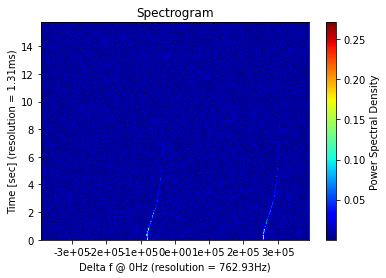

In [6]:
plot_spectrogram(xx, yy, zz)

In [7]:
xa, ya, za = iq.get_averaged_spectrum(xx, yy, zz, 10)

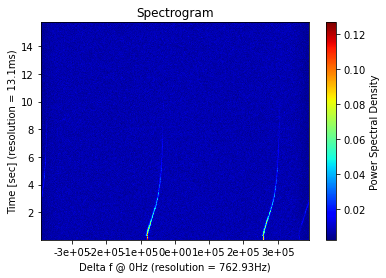

In [8]:
plot_spectrogram(xa, ya, za)

In [9]:
sl = slice(200,800)

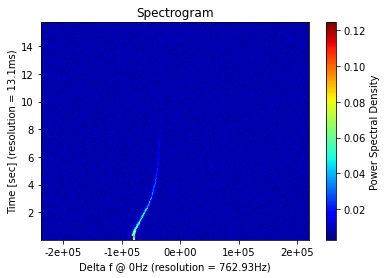

In [10]:
plot_spectrogram(xa[:, sl], ya[:, sl], za[:, sl])

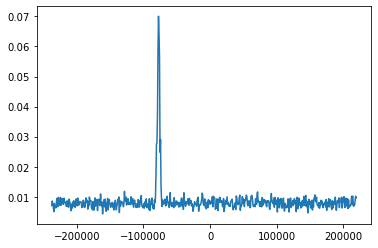

In [11]:
plt.plot(xa[50, sl], za[50, sl])

In [12]:
x, y = IQBase.get_frame_sum_vs_time(xa[:, sl], ya[:, sl], za[:, sl])

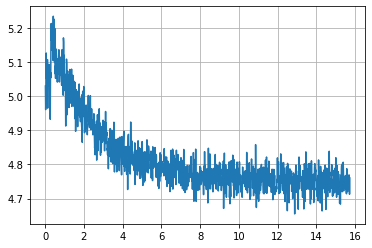

In [13]:
plt.plot(x, y)
plt.grid()

In [14]:
p = [4.5, 0.05, 20]
popt, pcov = curve_fit(fit_function, x, y, p0=p)

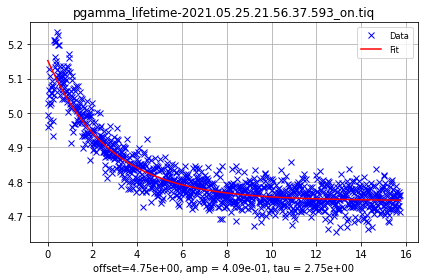

In [15]:
# plot with original data
fig = plt.figure()
ax = fig.gca()
ax.plot(x, y, 'bx', label='Data')
ax.plot(x, fit_function(x, *popt), 'r', label='Fit')
ax.set_xlabel('offset={:0.2e}, amp = {:0.2e}, tau = {:0.2e}'.format(
    popt[0], popt[1], popt[2]))
ax.set_title(filename)
ax.grid()
# Now add the legend with some customizations.
legend = ax.legend(loc='upper right', shadow=False)

# Set legend fontsize
for label in legend.get_texts():
    label.set_fontsize('small')
plt.tight_layout()
plt.savefig(filename+'.png')

In [16]:
write_spectrum_to_root(x, y, filename = filename)

In [17]:
popt

array([4.74555687, 0.40868238, 2.74881441])